<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_FeatureImportanceComplexNetworkRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [2]:
#help(geometric_mean_score)

In [3]:
import os
from os import path

import pandas as pd
import numpy as np

In [4]:
from matplotlib import pyplot as plt 
import seaborn as sns

In [5]:
base_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"

assert path.exists(features_folder)

folders = os.listdir(features_folder)

folders

['1-covid', '2-other-viruses']

In [6]:
case_study = path.join(features_folder, folders[0])

print(case_study,'\n')

files = os.listdir(case_study)

files

/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed/1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

In [7]:
file = files[1]

print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))

print('Shape ', frame.shape)

frame.head()

loading data from... complex-network-k3l10.csv
Shape  (1717, 122)


,nameseq,AB.1,AD.1,ASSD.1,MAXD.1,MIND.1,AS.1,APL.1,TALU.1,TU.1,NE.1,MOT3.1,MOT4.1,AB.2,AD.2,ASSD.2,MAXD.2,MIND.2,AS.2,APL.2,TALU.2,TU.2,NE.2,MOT3.2,MOT4.2,AB.3,AD.3,ASSD.3,MAXD.3,MIND.3,AS.3,APL.3,TALU.3,TU.3,NE.3,MOT3.3,MOT4.3,AB.4,AD.4,ASSD.4,...,NE.7,MOT3.7,MOT4.7,AB.8,AD.8,ASSD.8,MAXD.8,MIND.8,AS.8,APL.8,TALU.8,TU.8,NE.8,MOT3.8,MOT4.8,AB.9,AD.9,ASSD.9,MAXD.9,MIND.9,AS.9,APL.9,TALU.9,TU.9,NE.9,MOT3.9,MOT4.9,AB.10,AD.10,ASSD.10,MAXD.10,MIND.10,AS.10,APL.10,TALU.10,TU.10,NE.10,MOT3.10,MOT4.10,label
0,MN369046,41.625,846.00000,0.579230,2270.0,122.0,487.151703,2.321429,0.113393,0.101449,27072.0,1544.0,10844.0,41.625,846.00000,0.579230,2270.0,122.0,487.151703,2.321429,0.113393,0.101449,27072.0,1544.0,10844.0,41.625,846.00000,0.579230,2270.0,122.0,487.151703,2.321429,0.113393,0.101449,27072.0,1544.0,10844.0,41.625,846.00000,0.579230,...,27072.0,1544.0,10844.0,41.750000,845.59375,0.578471,2270.0,115.0,487.716001,2.325397,0.114881,0.102314,27072.0,1530.0,10707.0,41.875000,844.84375,0.577208,2270.0,107.0,488.757839,2.329365,0.110119,0.096356,27072.0,1515.0,10581.0,41.921875,844.56250,0.576741,2270.0,107.0,489.160885,2.330853,0.105320,0.091361,27072.0,1511.0,10553.0,0
1,MN306046,41.625,852.09375,0.577884,2296.0,126.0,491.176989,2.321429,0.113393,0.101449,27267.0,1544.0,10844.0,41.625,852.09375,0.577884,2296.0,126.0,491.176989,2.321429,0.113393,0.101449,27267.0,1544.0,10844.0,41.625,852.09375,0.577884,2296.0,126.0,491.176989,2.321429,0.113393,0.101449,27267.0,1544.0,10844.0,41.625,852.09375,0.577884,...,27267.0,1544.0,10844.0,41.625000,852.09375,0.577884,2296.0,126.0,491.176989,2.321429,0.113393,0.101449,27267.0,1544.0,10844.0,41.828125,851.09375,0.576210,2296.0,118.0,492.552558,2.327877,0.113728,0.101227,27267.0,1520.0,10618.0,41.875000,850.81250,0.575657,2296.0,109.0,492.944370,2.329365,0.110119,0.096356,27267.0,1515.0,10581.0,0
2,MF542265,41.625,852.12500,0.578589,2292.0,128.0,491.799200,2.321429,0.113393,0.101449,27268.0,1544.0,10844.0,41.625,852.12500,0.578589,2292.0,128.0,491.799200,2.321429,0.113393,0.101449,27268.0,1544.0,10844.0,41.625,852.12500,0.578589,2292.0,128.0,491.799200,2.321429,0.113393,0.101449,27268.0,1544.0,10844.0,41.625,852.12500,0.578589,...,27268.0,1544.0,10844.0,41.703125,851.53125,0.577599,2292.0,128.0,492.603256,2.323909,0.112091,0.100426,27268.0,1533.0,10747.0,41.765625,851.28125,0.577116,2292.0,120.0,492.950475,2.325893,0.108929,0.095647,27268.0,1527.0,10699.0,41.875000,851.00000,0.576620,2292.0,111.0,493.365737,2.329365,0.110119,0.096356,27268.0,1515.0,10581.0,0
3,KY983587,41.625,851.00000,0.578901,2294.0,124.0,490.863493,2.321429,0.113393,0.101449,27232.0,1544.0,10844.0,41.625,851.00000,0.578901,2294.0,124.0,490.863493,2.321429,0.113393,0.101449,27232.0,1544.0,10844.0,41.625,851.00000,0.578901,2294.0,124.0,490.863493,2.321429,0.113393,0.101449,27232.0,1544.0,10844.0,41.625,851.00000,0.578901,...,27232.0,1544.0,10844.0,41.703125,850.59375,0.578187,2294.0,124.0,491.410874,2.323909,0.112091,0.100426,27232.0,1533.0,10747.0,41.875000,849.84375,0.576891,2294.0,108.0,492.470533,2.329365,0.110119,0.096356,27232.0,1515.0,10581.0,41.875000,849.84375,0.576891,2294.0,108.0,492.470533,2.329365,0.110119,0.096356,27232.0,1515.0,10581.0,0
4,KY621348,41.625,848.15625,0.579211,2270.0,126.0,488.758958,2.321429,0.113393,0.101449,27141.0,1544.0,10844.0,41.625,848.15625,0.579211,2270.0,126.0,488.758958,2.321429,0.113393,0.101449,27141.0,1544.0,10844.0,41.625,848.15625,0.579211,2270.0,126.0,488.758958,2.321429,0.113393,0.101449,27141.0,1544.0,10844.0,41.625,848.15625,0.579211,...,27141.0,1544.0,10844.0,41.625000,847.78125,0.578554,2270.0,126.0,489.258925,2.321429,0.113393,0.101449,27141.0,1544.0,10844.0,41.875000,847.03125,0.577234,2270.0,110.0,490.325815,2.329365,0.110119,0.096356,27141.0,1515.0,10581.0,41.875000,847.03125,0.577234,2270.0,110.0,490.325815,2.329365,0.110119,0.096356,27141.0,1515.0,10581.0,0


In [8]:
rows, columns = frame.shape

X = frame.iloc[:,1:(columns-1)]
y   = frame.iloc[:, -1]

labels = frame['label']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 120)
(516, 120)


In [9]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [10]:
predicted = model.predict(test)

In [11]:
confusion_matrix(test_labels, predicted, labels=[1, 0])

array([[395,   0],
       [  0, 121]])

In [12]:
geometric_mean_score(test_labels, predicted)

1.0

In [13]:
model.feature_importances_

array([9.05069700e-05, 0.00000000e+00, 7.19380871e-02, 4.61873440e-03,
       1.24294611e-02, 3.34610961e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.16173569e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25901979e-02, 1.38985038e-01, 2.50975265e-03,
       2.53058425e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14979060e-04, 0.00000000e+00, 4.52192584e-05,
       0.00000000e+00, 0.00000000e+00, 1.04744052e-01, 1.06240601e-03,
       3.98863519e-02, 8.16722968e-04, 0.00000000e+00, 0.00000000e+00,
       4.31615377e-05, 6.06880413e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.36025782e-05, 7.84427076e-02, 5.56515419e-03,
       1.94971508e-02, 1.62009844e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.64826628e-05, 0.00000000e+00, 0.00000000e+00,
       4.46097759e-05, 6.03558149e-03, 6.16544700e-02, 1.22839986e-03,
       1.51990200e-02, 6.06429379e-03, 0.00000000e+00, 0.00000000e+00,
      

In [14]:
indices = np.argsort(model.feature_importances_)[::-1]

len(indices)

120

In [15]:
attributes = list(frame.columns)

attributes.remove('nameseq')
attributes.remove('label')

len(attributes)

120

In [16]:
for i in range(X.shape[1]):
  print(i+1, attributes[indices[i]], indices[i], model.feature_importances_[indices[i]])
  if i > 10:
    break

1 ASSD.2 14 0.13898503792639913
2 ASSD.3 26 0.10474405248697842
3 ASSD.4 38 0.07844270759650525
4 ASSD.1 2 0.07193808710277876
5 ASSD.9 98 0.07068144791272041
6 ASSD.5 50 0.06165447004314242
7 ASSD.6 62 0.04225427642689292
8 ASSD.8 86 0.04190146032052551
9 ASSD.7 74 0.040375935787781314
10 MIND.3 28 0.03988635193290944
11 ASSD.10 110 0.03644537898081623
12 MIND.2 16 0.02530584252925618


Text(0.5, 0, 'Features')

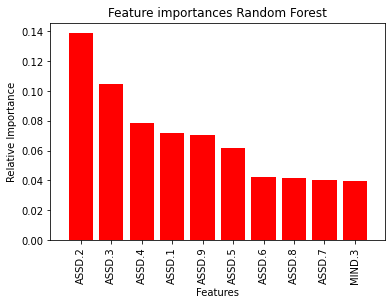

In [17]:

plt.figure()

col_order = [attributes[i] for i in indices]
feature_importance = model.feature_importances_[indices]

max_indice = 10
interval = slice(max_indice)

plt.title("Feature importances Random Forest")
plt.bar(range(max_indice), feature_importance[interval], color="r", align="center")
plt.xlim([-1, max_indice])
plt.xticks(range(max_indice), col_order[interval], rotation='vertical')

plt.ylabel('Relative Importance')
plt.xlabel('Features')
# plt.show()

--- 

## Test with most importante features

In [18]:
selected_features = ['ASSD.2', 'ASSD.3', 'label']


In [19]:
print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))[selected_features]

print('Shape ', frame.shape)

frame.head()

loading data from... complex-network-k3l10.csv
Shape  (1717, 3)


,ASSD.2,ASSD.3,label
0,0.579230,0.579230,0
1,0.577884,0.577884,0
2,0.578589,0.578589,0
3,0.578901,0.578901,0
4,0.579211,0.579211,0


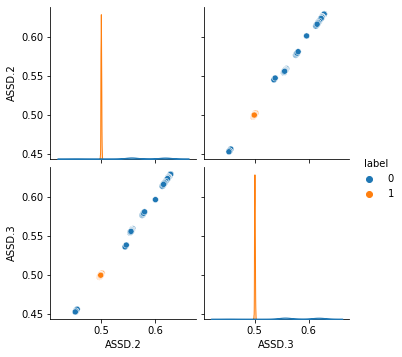

In [20]:
sns.pairplot(frame, hue='label')

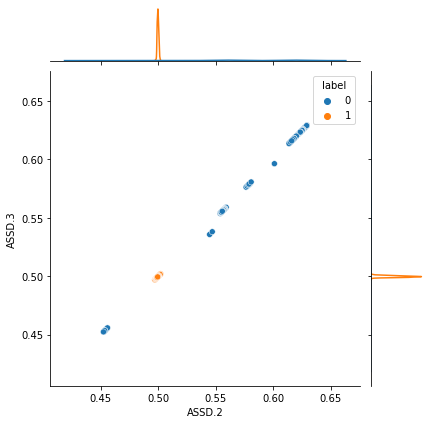

In [21]:
g = sns.JointGrid(data=frame, x=selected_features[0], y=selected_features[1], hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [22]:
rows, columns = frame.shape

X = frame.drop(labels=['label'], axis=1)
y   = frame['label']

labels = frame['label']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 2)
(516, 2)


In [23]:
X.head()

,ASSD.2,ASSD.3
0,0.579230,0.579230
1,0.577884,0.577884
2,0.578589,0.578589
3,0.578901,0.578901
4,0.579211,0.579211


In [24]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

predicted = model.predict(test)

In [25]:
confusion_matrix(test_labels, predicted, labels=[0, 1])

array([[121,   0],
       [  0, 395]])

In [26]:
geometric_mean_score(test_labels, predicted)

1.0